## Setup

In [ ]:
import os, random, shutil
import zipfile
import numpy as np
import tensorflow as tf
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from natsort import natsorted

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#from keras.applications.vgg16 import VGG16

In [ ]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
dest = 'gdrive/My Drive/NIR_Pill_By_Type_And_Filters_Data_Augmented/'
labels = ['allo/', 'amio/', 'clari/', 'furo/', 'irb/', 'levo/', 'simva/', 'trama/']

In [ ]:
for label in labels:
    files_NIR = os.listdir(dest+ label)
    for file_NIR in files_NIR:
        if file_NIR == '.DS_Store':
            #shutil.rmtree(dest + label + file_NIR)
            os.remove(dest+label+file_NIR)

In [ ]:
for label in labels:
    files_NIR = os.listdir(dest+ label)
    for file_NIR in files_NIR:
        images_NIR = os.listdir(dest + label + file_NIR)
        for image_NIR in images_NIR:

            if image_NIR == '.DS_Store':
            #shutil.rmtree(dest + label + file_NIR)
                os.remove(dest+label+file_NIR+'/'+image_NIR)
            if image_NIR.find('(1)') != -1:
                print(image_NIR + ' from ' + file_NIR)
                os.remove(dest+label+file_NIR+'/'+image_NIR)



# Loading data and preprocessing

In [ ]:
from scipy import ndimage
import cv2 

# Normalising between 0 and 1

def normalize(volume):
    """Normalize the volume"""
    min = np.min(volume)
    max = np.max(volume)
    volume = (volume - min) / (max - min)
    volume = volume.astype("float32")
    return volume

In [ ]:
def resize_volume(img):
    """Resize across z-axis"""
    # Set the desired depth
    desired_depth = 27
    desired_width = 270
    desired_height = 128
    # Get current depth
    current_depth = img.shape[-1]
    current_width = img.shape[0]
    current_height = img.shape[1]
    # Compute depth factor
    depth = current_depth / desired_depth
    width = current_width / desired_width
    height = current_height / desired_height
    depth_factor = 1 / depth
    width_factor = 1 / width
    height_factor = 1 / height
    # Rotate
    img = ndimage.rotate(img, 90, reshape=False)
    # Resize across z-axis
    img = ndimage.zoom(img, (width_factor, height_factor, depth_factor), order=1)
    return img


def process_scan(volume):
    """Read and resize volume"""
    # print(volume.shape)
    # print(volume)
    # Normalize
    volume = normalize(volume)
    # print(volume.shape)
    # print(volume)
    # Resize width, height and depth
    ##volume = resize_volume(volume)
    # print(volume.shape)
    # print(volume)
    return volume


Let's read the paths of the multi-spectral photos from the class directories.

In [ ]:
# Folder "allo" consists of 14 other folders each containing 7 photos (equivalent of CT-0)
# Get the paths to 'allo'
# Do this for each pill as it's an 8-ary classification problem (CT scan is binary classification)
allo_paths = [
    os.path.join(os.getcwd(), dest + "allo", x)
    for x in os.listdir(dest + "allo")
]
allo_paths = natsorted(allo_paths)

amio_paths = [
    os.path.join(os.getcwd(), dest + "amio", x)
    for x in os.listdir(dest + "amio")
]
amio_paths = natsorted(amio_paths)

clari_paths = [
    os.path.join(os.getcwd(), dest + "clari", x)
    for x in os.listdir(dest + "clari")
]
clari_paths = natsorted(clari_paths)

furo_paths = [
    os.path.join(os.getcwd(), dest + "furo", x)
    for x in os.listdir(dest + "furo")
]
furo_paths = natsorted(furo_paths)

irb_paths = [
    os.path.join(os.getcwd(), dest + "irb", x)
    for x in os.listdir(dest + "irb")
]
irb_paths = natsorted(irb_paths)


levo_paths = [
    os.path.join(os.getcwd(), dest + "levo", x)
    for x in os.listdir(dest + "levo")
]
levo_paths = natsorted(levo_paths)

simva_paths = [
    os.path.join(os.getcwd(),dest + "simva", x)
    for x in os.listdir(dest + "simva")
]
simva_paths = natsorted(simva_paths)

trama_paths = [
    os.path.join(os.getcwd(), dest + "trama", x)
    for x in os.listdir(dest + "trama")
]
trama_paths = natsorted(trama_paths)

print("Allopurinol photos: " + str(len(allo_paths)))
print("Furosémide photos: " + str(len(furo_paths)))
print("Amiodarone arrow photos: " + str(len(amio_paths)))
print("Tramadol photos: " + str(len(trama_paths)))
print("Simvastatine photos: " + str(len(simva_paths)))
print("Irbésartan photos: " + str(len(irb_paths)))
print("Lévocétirizine photos: " + str(len(levo_paths)))
print("Clarithromycine photos: " + str(len(clari_paths)))

Allopurinol photos: 120
Furosémide photos: 120
Amiodarone arrow photos: 120
Tramadol photos: 120
Simvastatine photos: 120
Irbésartan photos: 120
Lévocétirizine photos: 120
Clarithromycine photos: 120


Getting the direct paths to the images for later concatenation

In [ ]:
paths_images_allo = list()
for path in allo_paths:
  path_im = [
    os.path.join(os.getcwd(), path, x)
    for x in os.listdir(path)
    ]
  paths_images_allo.append(path_im)

paths_images_amio = list()
for path in amio_paths:
  path_im = [
    os.path.join(os.getcwd(), path, x)
    for x in os.listdir(path)
    ]
  paths_images_amio.append(path_im)

paths_images_clari = list()
for path in clari_paths:
  path_im = [
    os.path.join(os.getcwd(), path, x)
    for x in os.listdir(path)
    ]
  paths_images_clari.append(path_im)

paths_images_furo = list()
for path in furo_paths:
  path_im = [
    os.path.join(os.getcwd(), path, x)
    for x in os.listdir(path)
    ]
  paths_images_furo.append(path_im)

paths_images_irb = list()
for path in irb_paths:
  path_im = [
    os.path.join(os.getcwd(), path, x)
    for x in os.listdir(path)
    ]
  paths_images_irb.append(path_im)

paths_images_levo = list()
for path in levo_paths:
  path_im = [
    os.path.join(os.getcwd(), path, x)
    for x in os.listdir(path)
    ]
  paths_images_levo.append(path_im)

paths_images_simva = list()
for path in simva_paths:
  path_im = [
    os.path.join(os.getcwd(), path, x)
    for x in os.listdir(path)
    ]
  paths_images_simva.append(path_im)

paths_images_trama = list()
for path in trama_paths:
  path_im = [
    os.path.join(os.getcwd(), path, x)
    for x in os.listdir(path)
    ]
  paths_images_trama.append(path_im)

#printing example
paths_images_trama[0]

['/content/gdrive/My Drive/NIR_Pill_By_Type_And_Filters_Data_Augmented/trama/aug_trama_1/aug_image6.jpg',
 '/content/gdrive/My Drive/NIR_Pill_By_Type_And_Filters_Data_Augmented/trama/aug_trama_1/aug_image1.jpg',
 '/content/gdrive/My Drive/NIR_Pill_By_Type_And_Filters_Data_Augmented/trama/aug_trama_1/aug_image5.jpg',
 '/content/gdrive/My Drive/NIR_Pill_By_Type_And_Filters_Data_Augmented/trama/aug_trama_1/aug_image8.jpg',
 '/content/gdrive/My Drive/NIR_Pill_By_Type_And_Filters_Data_Augmented/trama/aug_trama_1/aug_image3.jpg',
 '/content/gdrive/My Drive/NIR_Pill_By_Type_And_Filters_Data_Augmented/trama/aug_trama_1/aug_image4.jpg',
 '/content/gdrive/My Drive/NIR_Pill_By_Type_And_Filters_Data_Augmented/trama/aug_trama_1/aug_image7.jpg',
 '/content/gdrive/My Drive/NIR_Pill_By_Type_And_Filters_Data_Augmented/trama/aug_trama_1/aug_image2.jpg',
 '/content/gdrive/My Drive/NIR_Pill_By_Type_And_Filters_Data_Augmented/trama/aug_trama_1/aug_image9.jpg']

In [ ]:
for i in range(119):
    paths_images_allo[i] = natsorted(paths_images_allo[i])
    paths_images_amio[i] = natsorted(paths_images_amio[i])
    paths_images_clari[i] = natsorted(paths_images_clari[i])
    paths_images_furo[i] = natsorted(paths_images_furo[i])
    paths_images_irb[i] = natsorted(paths_images_irb[i])
    paths_images_levo[i] = natsorted(paths_images_levo[i])
    paths_images_simva[i] = natsorted(paths_images_simva[i])
    paths_images_trama[i] = natsorted(paths_images_trama[i])

In [ ]:
paths_images_trama[0]

['/content/gdrive/My Drive/NIR_Pill_By_Type_And_Filters_Data_Augmented/trama/aug_trama_1/aug_image1.jpg',
 '/content/gdrive/My Drive/NIR_Pill_By_Type_And_Filters_Data_Augmented/trama/aug_trama_1/aug_image2.jpg',
 '/content/gdrive/My Drive/NIR_Pill_By_Type_And_Filters_Data_Augmented/trama/aug_trama_1/aug_image3.jpg',
 '/content/gdrive/My Drive/NIR_Pill_By_Type_And_Filters_Data_Augmented/trama/aug_trama_1/aug_image4.jpg',
 '/content/gdrive/My Drive/NIR_Pill_By_Type_And_Filters_Data_Augmented/trama/aug_trama_1/aug_image5.jpg',
 '/content/gdrive/My Drive/NIR_Pill_By_Type_And_Filters_Data_Augmented/trama/aug_trama_1/aug_image6.jpg',
 '/content/gdrive/My Drive/NIR_Pill_By_Type_And_Filters_Data_Augmented/trama/aug_trama_1/aug_image7.jpg',
 '/content/gdrive/My Drive/NIR_Pill_By_Type_And_Filters_Data_Augmented/trama/aug_trama_1/aug_image8.jpg',
 '/content/gdrive/My Drive/NIR_Pill_By_Type_And_Filters_Data_Augmented/trama/aug_trama_1/aug_image9.jpg']

## Build train and validation datasets
Read the scans from the class directories and assign labels. Downsample the scans to have
shape of 128x128x64. Rescale to the range 0 to 1.
Lastly, split the dataset into train and validation subsets.

In [ ]:
images_pix_allo  = list() # 120 folders, 9 images par folder => 1080 images 
#size de imagges_pix_allo = 1080
scan_list_allo = np.empty([120,180,270,27], dtype=float) 
for jpgs in paths_images_allo:
  
  
  for path in jpgs:
      images_pix_allo.append(cv2.imread(path))


i = 0
j = 0
#for array in range(1,9*i):
while i < 1080:
    conc = images_pix_allo[i]
    conc = np.concatenate((conc, images_pix_allo[i+1]), axis=-1)
    conc = np.concatenate((conc, images_pix_allo[i+2]), axis=-1)
    conc = np.concatenate((conc, images_pix_allo[i+3]), axis=-1)
    conc = np.concatenate((conc, images_pix_allo[i+4]), axis=-1)
    conc = np.concatenate((conc, images_pix_allo[i+5]), axis=-1)
    conc = np.concatenate((conc, images_pix_allo[i+6]), axis=-1)
    conc = np.concatenate((conc, images_pix_allo[i+7]), axis=-1)
    conc = np.concatenate((conc, images_pix_allo[i+8]), axis=-1)
    scan_list_allo[j] = normalize(conc)
    i += 9
    j += 1

print(cv2.imread(path).shape, len(images_pix_allo), len(scan_list_allo))

#del conc
del images_pix_allo

allo_scans = np.array([scan_list_allo[j] for j in range(120)], dtype = float)
del scan_list_allo
print("Allopuriol photos: " + str(allo_scans.shape))

(180, 270, 3) 1080 120
Allopuriol photos: (120, 180, 270, 27)


In [ ]:
images_pix_amio  = list()
scan_list_amio = np.empty([120,180,270,27], dtype=float)
for jpgs in paths_images_amio:
  
  
  for path in jpgs:
      images_pix_amio.append(cv2.imread(path))


i = 0
j = 0

while i < 1080:
    conc = images_pix_amio[i]
    conc = np.concatenate((conc, images_pix_amio[i+1]), axis=-1)
    conc = np.concatenate((conc, images_pix_amio[i+2]), axis=-1)
    conc = np.concatenate((conc, images_pix_amio[i+3]), axis=-1)
    conc = np.concatenate((conc, images_pix_amio[i+4]), axis=-1)
    conc = np.concatenate((conc, images_pix_amio[i+5]), axis=-1)
    conc = np.concatenate((conc, images_pix_amio[i+6]), axis=-1)
    conc = np.concatenate((conc, images_pix_amio[i+7]), axis=-1)
    conc = np.concatenate((conc, images_pix_amio[i+8]), axis=-1)
    scan_list_amio[j] = normalize(conc)
    i += 9
    j += 1

print(cv2.imread(path).shape, len(images_pix_amio), len(scan_list_amio))

#del conc
del images_pix_amio

amio_scans = np.array([scan_list_amio[j] for j in range(120)], dtype = float)
del scan_list_amio
print("amiopuriol photos: " + str(amio_scans.shape))

(180, 270, 3) 1080 120
amiopuriol photos: (120, 180, 270, 27)


In [ ]:
images_pix_clari  = list()
scan_list_clari = np.empty([120,180,270,27], dtype=float)
for jpgs in paths_images_clari:
  
  
  for path in jpgs:
      images_pix_clari.append(cv2.imread(path))


i = 0
j = 0
while i < 1080: 
    conc = images_pix_clari[i]
    conc = np.concatenate((conc, images_pix_clari[i+1]), axis=-1)
    conc = np.concatenate((conc, images_pix_clari[i+2]), axis=-1)
    conc = np.concatenate((conc, images_pix_clari[i+3]), axis=-1)
    conc = np.concatenate((conc, images_pix_clari[i+4]), axis=-1)
    conc = np.concatenate((conc, images_pix_clari[i+5]), axis=-1)
    conc = np.concatenate((conc, images_pix_clari[i+6]), axis=-1)
    conc = np.concatenate((conc, images_pix_clari[i+7]), axis=-1)
    conc = np.concatenate((conc, images_pix_clari[i+8]), axis=-1)
    scan_list_clari[j] = normalize(conc)
    i += 9
    j += 1

print(cv2.imread(path).shape, len(images_pix_clari), len(scan_list_clari))

#del conc
del images_pix_clari

clari_scans = np.array([scan_list_clari[j] for j in range(120)], dtype = float)
del scan_list_clari
print("Clari photos: " + str(clari_scans.shape))

(180, 270, 3) 1080 120
Clari photos: (120, 180, 270, 27)


In [ ]:
images_pix_furo  = list()
scan_list_furo = np.empty([120,180,270,27], dtype=float)
for jpgs in paths_images_furo:
  
  
  for path in jpgs:
      images_pix_furo.append(cv2.imread(path))


i = 0
j = 0

while i < 1080:
    conc = images_pix_furo[i]
    conc = np.concatenate((conc, images_pix_furo[i+1]), axis=-1)
    conc = np.concatenate((conc, images_pix_furo[i+2]), axis=-1)
    conc = np.concatenate((conc, images_pix_furo[i+3]), axis=-1)
    conc = np.concatenate((conc, images_pix_furo[i+4]), axis=-1)
    conc = np.concatenate((conc, images_pix_furo[i+5]), axis=-1)
    conc = np.concatenate((conc, images_pix_furo[i+6]), axis=-1)
    conc = np.concatenate((conc, images_pix_furo[i+7]), axis=-1)
    conc = np.concatenate((conc, images_pix_furo[i+8]), axis=-1)
    scan_list_furo[j] = normalize(conc)
    i += 9
    j += 1

print(cv2.imread(path).shape, len(images_pix_furo), len(scan_list_furo))

#del conc
del images_pix_furo

furo_scans = np.array([scan_list_furo[j] for j in range(120)], dtype = float)
del scan_list_furo
print("furo photos: " + str(furo_scans.shape))

(180, 270, 3) 1080 120
furo photos: (120, 180, 270, 27)


In [ ]:
images_pix_irb  = list()
scan_list_irb = np.empty([120,180,270,27], dtype=float)
for jpgs in paths_images_irb:
  
  
  for path in jpgs:
      images_pix_irb.append(cv2.imread(path))


i = 0
j = 0

while i < 1080:
    conc = images_pix_irb[i]
    conc = np.concatenate((conc, images_pix_irb[i+1]), axis=-1)
    conc = np.concatenate((conc, images_pix_irb[i+2]), axis=-1)
    conc = np.concatenate((conc, images_pix_irb[i+3]), axis=-1)
    conc = np.concatenate((conc, images_pix_irb[i+4]), axis=-1)
    conc = np.concatenate((conc, images_pix_irb[i+5]), axis=-1)
    conc = np.concatenate((conc, images_pix_irb[i+6]), axis=-1)
    conc = np.concatenate((conc, images_pix_irb[i+7]), axis=-1)
    conc = np.concatenate((conc, images_pix_irb[i+8]), axis=-1)
    scan_list_irb[j] = normalize(conc)
    i += 9
    j += 1

print(cv2.imread(path).shape, len(images_pix_irb), len(scan_list_irb))

#del conc
del images_pix_irb

irb_scans = np.array([scan_list_irb[j] for j in range(120)], dtype = float)
del scan_list_irb
print("irb photos: " + str(irb_scans.shape))

(180, 270, 3) 1080 120
irb photos: (120, 180, 270, 27)


In [ ]:
images_pix_levo  = list()
scan_list_levo = np.empty([120,180,270,27], dtype=float)
for jpgs in paths_images_levo:
  
  
  for path in jpgs:
      images_pix_levo.append(cv2.imread(path))


i = 0
j = 0
while i < 1080:
    conc = images_pix_levo[i]
    conc = np.concatenate((conc, images_pix_levo[i+1]), axis=-1)
    conc = np.concatenate((conc, images_pix_levo[i+2]), axis=-1)
    conc = np.concatenate((conc, images_pix_levo[i+3]), axis=-1)
    conc = np.concatenate((conc, images_pix_levo[i+4]), axis=-1)
    conc = np.concatenate((conc, images_pix_levo[i+5]), axis=-1)
    conc = np.concatenate((conc, images_pix_levo[i+6]), axis=-1)
    conc = np.concatenate((conc, images_pix_levo[i+7]), axis=-1)
    conc = np.concatenate((conc, images_pix_levo[i+8]), axis=-1)
    scan_list_levo[j] = normalize(conc)
    i += 9
    j += 1

print(cv2.imread(path).shape, len(images_pix_levo), len(scan_list_levo))

#del conc
del images_pix_levo

levo_scans = np.array([scan_list_levo[j] for j in range(120)], dtype = float)
del scan_list_levo
print("levo photos: " + str(levo_scans.shape))

(180, 270, 3) 1080 120
levo photos: (120, 180, 270, 27)


In [ ]:
images_pix_simva  = list()
scan_list_simva = np.empty([120,180,270,27], dtype=float)
for jpgs in paths_images_simva:
  
  
  for path in jpgs:
      images_pix_simva.append(cv2.imread(path))


i = 0
j = 0
while i < 1080:
    conc = images_pix_simva[i]
    conc = np.concatenate((conc, images_pix_simva[i+1]), axis=-1)
    conc = np.concatenate((conc, images_pix_simva[i+2]), axis=-1)
    conc = np.concatenate((conc, images_pix_simva[i+3]), axis=-1)
    conc = np.concatenate((conc, images_pix_simva[i+4]), axis=-1)
    conc = np.concatenate((conc, images_pix_simva[i+5]), axis=-1)
    conc = np.concatenate((conc, images_pix_simva[i+6]), axis=-1)
    conc = np.concatenate((conc, images_pix_simva[i+7]), axis=-1)
    conc = np.concatenate((conc, images_pix_simva[i+8]), axis=-1)
    scan_list_simva[j] = normalize(conc)
    i += 9
    j += 1

print(cv2.imread(path).shape, len(images_pix_simva), len(scan_list_simva))

#del conc
del images_pix_simva

simva_scans = np.array([scan_list_simva[j] for j in range(120)], dtype = float)
del scan_list_simva
print("simva photos: " + str(simva_scans.shape))

(180, 270, 3) 1080 120
simva photos: (120, 180, 270, 27)


In [ ]:
images_pix_trama  = list()
scan_list_trama = np.empty([120,180,270,27], dtype=float)
for jpgs in paths_images_trama:
  
  
  for path in jpgs:
      images_pix_trama.append(cv2.imread(path))


i = 0
j = 0

while i < 1080:
    conc = images_pix_trama[i]
    conc = np.concatenate((conc, images_pix_trama[i+1]), axis=-1)
    conc = np.concatenate((conc, images_pix_trama[i+2]), axis=-1)
    conc = np.concatenate((conc, images_pix_trama[i+3]), axis=-1)
    conc = np.concatenate((conc, images_pix_trama[i+4]), axis=-1)
    conc = np.concatenate((conc, images_pix_trama[i+5]), axis=-1)
    conc = np.concatenate((conc, images_pix_trama[i+6]), axis=-1)
    conc = np.concatenate((conc, images_pix_trama[i+7]), axis=-1)
    conc = np.concatenate((conc, images_pix_trama[i+8]), axis=-1)
    scan_list_trama[j] = normalize(conc)
    i += 9
    j += 1

print(cv2.imread(path).shape, len(images_pix_trama), len(scan_list_trama))

#del conc
del images_pix_trama

trama_scans = np.array([scan_list_trama[j] for j in range(120)], dtype = float)
del scan_list_trama
print("trama photos: " + str(trama_scans.shape))

(180, 270, 3) 1080 120
trama photos: (120, 180, 270, 27)


In [ ]:
del path
del jpgs 
del paths_images_trama
del paths_images_simva
del paths_images_levo
del paths_images_irb
del paths_images_furo
del paths_images_allo
del paths_images_amio
del paths_images_clari
del conc

# Next

In [ ]:
len(allo_scans)

120

In [ ]:
# Assign values of 0 to 7 as labels for classification for each pill
allo_labels = np.array([0 for _ in range(len(allo_scans))])
amio_labels = np.array([1 for _ in range(len(amio_scans))])
clari_labels = np.array([2 for _ in range(len(clari_scans))])
furo_labels = np.array([3 for _ in range(len(furo_scans))])
irb_labels = np.array([4 for _ in range(len(irb_scans))])
levo_labels = np.array([5 for _ in range(len(levo_scans))])
simva_labels = np.array([6 for _ in range(len(simva_scans))])
trama_labels = np.array([7 for _ in range(len(trama_scans))])

# Split data in the ratio 70-30% for training and validation (10 photos for training and 4 for validation).
x_train = np.concatenate((allo_scans[:84], 
                          amio_scans[:84],
                          clari_scans[:84],
                          furo_scans[:84],
                          irb_scans[:84],
                          levo_scans[:84],
                          simva_scans[:84],
                          trama_scans[:84]), axis=0)
y_train = np.concatenate((allo_labels[:84], 
                          amio_labels[:84],
                          clari_labels[:84],
                          furo_labels[:84],
                          irb_labels[:84],
                          levo_labels[:84],
                          simva_labels[:84],
                          trama_labels[:84]), axis=0)
x_val = np.concatenate((allo_scans[84:110], 
                          amio_scans[84:110],
                          clari_scans[84:110],
                          furo_scans[84:110],
                          irb_scans[84:110],
                          levo_scans[84:110],
                          simva_scans[84:110],
                          trama_scans[84:110]), axis=0)
y_val = np.concatenate((allo_labels[84:110], 
                          amio_labels[84:110],
                          clari_labels[84:110],
                          furo_labels[84:110],
                          irb_labels[84:110],
                          levo_labels[84:110],
                          simva_labels[84:110],
                          trama_labels[84:110]), axis=0)

x_test = np.concatenate((allo_scans[110:], 
                          amio_scans[110:],
                          clari_scans[110:],
                          furo_scans[110:],
                          irb_scans[110:],
                          levo_scans[110:],
                          simva_scans[110:],
                          trama_scans[110:]), axis=0)
y_test = np.concatenate((allo_labels[110:], 
                          amio_labels[110:],
                          clari_labels[110:],
                          furo_labels[110:],
                          irb_labels[110:],
                          levo_labels[110:],
                          simva_labels[110:],
                          trama_labels[110:]), axis=0)
print(
    "Number of samples in train and validation are %d and %d."
    % (x_train.shape[0], x_val.shape[0])
)


# x_train = np.concatenate((allo_scans, 
#                           amio_scans,
#                           clari_scans,
#                           furo_scans,
#                           irb_scans,
#                           levo_scans,
#                           simva_scans,
#                           trama_scans), axis=0)
# y_train = np.concatenate((allo_labels, 
#                           amio_labels,
#                           clari_labels,
#                           furo_labels,
#                           irb_labels,
#                           levo_labels,
#                           simva_labels,
#                           trama_labels), axis=0)


Number of samples in train and validation are 672 and 208.


In [ ]:
del allo_scans
del amio_scans
del clari_scans
del furo_scans 
del irb_scans
del levo_scans
del simva_scans
del trama_scans

In [ ]:
x_train.shape[0], y_train.shape[0], x_val.shape[0], y_val.shape[0]

(672, 672, 208, 208)

In [ ]:
x_train[1][1][1]

array([0.16455697, 0.11392405, 0.56118143, 0.56962025, 0.05063291,
       0.59071732, 0.39240506, 0.        , 0.51054853, 0.49367088,
       0.        , 0.37130803, 0.46413502, 0.        , 0.31645569,
       0.51898736, 0.        , 0.3628692 , 0.5527426 , 0.07594936,
       0.38818565, 0.33333334, 0.05063291, 0.43881857, 0.64978904,
       0.11392405, 0.44725737])

## Data augmentation

The CT scans also augmented by rotating at random angles during training. Since
the data is stored in rank-3 tensors of shape `(samples, height, width, depth)`,
we add a dimension of size 1 at axis 4 to be able to perform 3D convolutions on
the data. The new shape is thus `(samples, height, width, depth, 1)`. There are
different kinds of preprocessing and augmentation techniques out there,
this example shows a few simple ones to get started.

In [ ]:
import random

from scipy import ndimage


@tf.function
def rotate(volume):
    """Rotate the volume by a few degrees"""

    def scipy_rotate(volume):
        # define some rotation angles
        angles = [-20, -10, -5, 5, 10, 20]
        # pick angles at random
        angle = random.choice(angles)
        # rotate volume
        volume = ndimage.rotate(volume, angle, reshape=False)
        volume[volume < 0] = 0
        volume[volume > 1] = 1
        return volume

    augmented_volume = tf.numpy_function(scipy_rotate, [volume], tf.float32)
    return augmented_volume


def train_preprocessing(volume, label):
    """Process training data by rotating and adding a channel."""
    # Rotate volume
    #volume = rotate(volume)
    volume = tf.expand_dims(volume, axis=3)
    return volume, label


def validation_preprocessing(volume, label):
    """Process validation data by only adding a channel."""
    volume = tf.expand_dims(volume, axis=3)
    return volume, label


While defining the train and validation data loader, the training data is passed through
and augmentation function which randomly rotates volume at different angles. Note that both
training and validation data are already rescaled to have values between 0 and 1.

In [ ]:
# Define data loaders.

train_loader = tf.data.Dataset.from_tensor_slices((x_train, y_train))
validation_loader = tf.data.Dataset.from_tensor_slices((x_val, y_val))


In [ ]:

batch_size = 8
# Augment the on the fly during training.
train_dataset = (
    train_loader.shuffle(len(x_train))
    .map(train_preprocessing)
    .batch(batch_size)
    .prefetch(2)
)
# Only rescale.
validation_dataset = (
    validation_loader.shuffle(len(x_val))
    .map(validation_preprocessing)
    .batch(batch_size)
    .prefetch(2)
)

Visualize an augmented CT scan.

Dimension of the CT scan is: (180, 270, 27, 1)


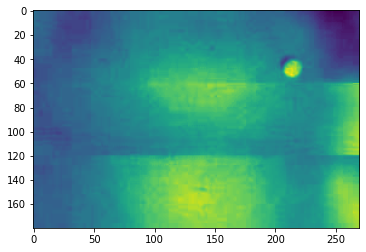

In [ ]:
import matplotlib.pyplot as plt

data = train_dataset.take(1)
images, labels = list(data)[0]
images = images.numpy()
image = images[0]
print("Dimension of the CT scan is:", image.shape)
plt.imshow(np.squeeze(image[:, :, 26]))


Since a CT scan has many slices, let's visualize a montage of the slices.

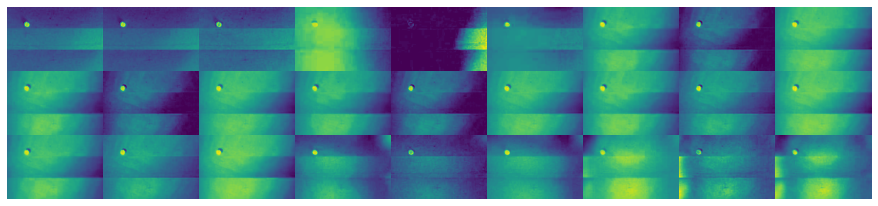

In [ ]:

def plot_slices(num_rows, num_columns, width, height, data):
    """Plot a montage of 20 CT slices"""
    data = np.rot90(np.array(data))
    data = np.transpose(data)
    data = np.reshape(data, (num_rows, num_columns, width, height))
    rows_data, columns_data = data.shape[0], data.shape[1]
    heights = [slc[0].shape[0] for slc in data]
    widths = [slc.shape[1] for slc in data[0]]
    fig_width = 12.0
    fig_height = fig_width * sum(heights) / sum(widths)
    f, axarr = plt.subplots(
        rows_data,
        columns_data,
        figsize=(fig_width, fig_height),
        gridspec_kw={"height_ratios": heights},
    )
    for i in range(rows_data):
        for j in range(columns_data):
            axarr[i, j].imshow(data[i][j])
            axarr[i, j].axis("off")
    plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
    plt.show()


# Visualize montage of slices.
# 4 rows and 10 columns for 100 slices of the CT scan.
plot_slices(3, 9, 180, 270, image[:, :, :40])

In [ ]:
del data
del images

## Define a 3D convolutional neural network

To make the model easier to understand, we structure it into blocks.
The architecture of the 3D CNN used in this example
is based on [this paper](https://arxiv.org/abs/2007.13224).

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

In [ ]:

def get_model(width=180, height=270, depth=27):
    """Build a 3D convolutional neural network model."""

    inputs = keras.Input((width, height, depth, 1))
    #model.load_weights("3d_image_classification.h5")

    ####### Conv Layers ###########################

    x = layers.Conv3D(filters=64, kernel_size=(3, 3, 3), activation="relu")(inputs)
    x = layers.MaxPool3D(pool_size=(2, 2, 2))(x) # 2
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Conv3D(filters=64, kernel_size=(3, 3, 3), activation="relu")(x)
    x = layers.MaxPool3D(pool_size=(2, 2, 2))(x) # 2
    x = layers.BatchNormalization(center=True, scale=True)(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Conv3D(filters=128, kernel_size=(3, 3, 3), activation="relu")(x)
    #x = layers.MaxPool3D(pool_size=2)(x) # 2
    x = layers.BatchNormalization(center=True, scale=True)(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Conv3D(filters=128, kernel_size=(4, 6, 3), activation="relu")(x)
    #x = layers.MaxPool3D(pool_size=2)(x) # 2
    x = layers.BatchNormalization(center=True, scale=True)(x)
    x = layers.Dropout(0.2)(x)


    ##x = layers.GlobalAveragePooling3D()(x)
    ##x = layers.Dense(units=512, activation="relu")(x)
    ##x = layers.Dropout(0.3)(x)


    x = layers.GlobalAveragePooling3D()(x)

    print(x.shape)

    #################### Feed Forward Neural Network ######################



    # load model without classifier layers
    #x = VGG16(include_top=False, input_shape=(300, 300, 3))(x)


    x = layers.Flatten()(x)
    x = layers.Dense(units=1024, activation="relu")(x)
    x = layers.Dense(units=1024, activation="relu")(x)
    ##x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(units=8, activation="softmax")(x) # Need 8 outputs (8 labels) + softmax instead of sigmoid 

    # Define the model.
    model = keras.Model(inputs, outputs, name="3dcnn")
    
    return model


# Build model.
model = get_model(width=180, height=270, depth=27)
model.summary()


(None, 128)
Model: "3dcnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180, 270, 27, 1)] 0         
_________________________________________________________________
conv3d (Conv3D)              (None, 178, 268, 25, 64)  1792      
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 89, 134, 12, 64)   0         
_________________________________________________________________
batch_normalization (BatchNo (None, 89, 134, 12, 64)   256       
_________________________________________________________________
dropout (Dropout)            (None, 89, 134, 12, 64)   0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 87, 132, 10, 64)   110656    
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 43, 66, 5, 64

## Train model

In [ ]:
# Define the validation set from x_val and y_val
print(y_val)
print(x_val.shape)

val_data = []
for label in range(32):
  val_data.append((x_val[label], y_val[label]))
val_data = np.array(val_data)
#print(val_data[0])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
(208, 180, 270, 27)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
# Compile model.
initial_learning_rate = 0.0001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True

)
model.compile(
    loss="sparse_categorical_crossentropy", # "binary_crossentropy"
    optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=["accuracy"], # "acc"
)

# model.compile(
#     loss="categorical_crossentropy", # "binary_crossentropy"
#     optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
#     metrics=["accuracy"], # "acc"
# )
# Define callbacks.
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "3d_image_classification.h5", save_best_only=True
)

#checkpoint = keras.callbacks.ModelCheckpoint(
 #   "3d_image_classification.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1
  #  )
callbacks = [checkpoint_cb]
early_stopping_cb = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=15)


# Train the model, doing validation at the end of each epoch
epochs = 20



In [ ]:
type(val_data), type(x_train), type(y_train), type(checkpoint_cb), type(callbacks)

(numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray,
 tensorflow.python.keras.callbacks.ModelCheckpoint,
 list)

In [ ]:
train_data = []
for label in range(80):
  train_data.append((x_train[label], y_train[label]))
train_data = np.array(train_data)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


In [ ]:
train_data.shape

(80, 2)

In [ ]:
history = model.fit(
         train_dataset,
         validation_data=validation_dataset,
         epochs=25,
         shuffle=True,
         verbose=1,
         callbacks=[checkpoint_cb, early_stopping_cb],
         )

Epoch 1/25
84/84 [==============================] - 63s 500ms/step - loss: 1.8156 - accuracy: 0.2919 - val_loss: 2.1180 - val_accuracy: 0.1250
Epoch 2/25
84/84 [==============================] - 45s 491ms/step - loss: 1.2067 - accuracy: 0.5755 - val_loss: 2.5592 - val_accuracy: 0.1250
Epoch 3/25
84/84 [==============================] - 46s 493ms/step - loss: 1.0024 - accuracy: 0.5986 - val_loss: 3.1601 - val_accuracy: 0.1250
Epoch 4/25
84/84 [==============================] - 47s 498ms/step - loss: 0.8303 - accuracy: 0.6810 - val_loss: 3.7026 - val_accuracy: 0.1250
Epoch 5/25
84/84 [==============================] - 47s 497ms/step - loss: 0.6307 - accuracy: 0.7610 - val_loss: 4.8957 - val_accuracy: 0.1250
Epoch 6/25
84/84 [==============================] - 47s 496ms/step - loss: 0.5955 - accuracy: 0.7847 - val_loss: 5.8843 - val_accuracy: 0.1250
Epoch 7/25
84/84 [==============================] - 47s 497ms/step - loss: 0.5680 - accuracy: 0.8013 - val_loss: 3.6412 - val_accuracy: 0.2212

It is important to note that the number of samples is very small (only 112) and we don't
specify a random seed. As such, you can expect significant variance in the results. A variability of 6-7% in the classification
performance is observed.

## Visualizing model performance

Here the model accuracy and loss for the training and the validation sets are plotted.
Since the validation set is class-balanced, accuracy provides an unbiased representation
of the model's performance.

In [ ]:
model.save('gdrive/My Drive/model_NIR_for_the_presentation_12th.h5')


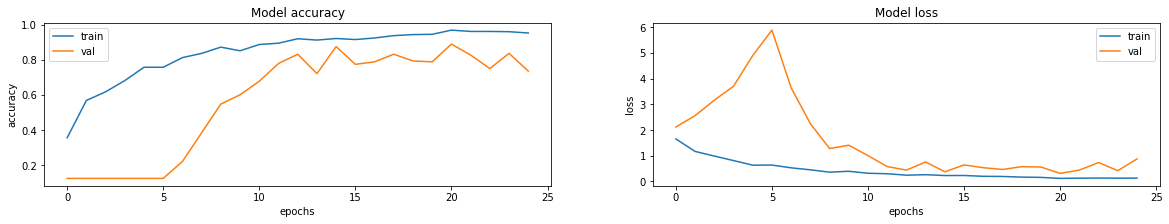

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, metric in enumerate(["accuracy", "loss"]):
    ax[i].plot(model.history.history[metric])
    ax[i].plot(model.history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

plt.savefig('gdrive/My Drive/3DCNN_Final_Graphs_12.jpg')

## Make predictions on a single image

In [ ]:
labels = ['allo/', 'amio/', 'clari/', 'furo/', 'irb/', 'levo/', 'simva/', 'trama/']

In [ ]:
# Load best weights.
model.load_weights("3d_image_classification.h5")
predictions = model.predict(np.expand_dims(x_test[74], axis=0))[0] #x_val.shape = (288, 180, 270, 27)

for prediction, label in zip(predictions, labels):
    print(
        "This model is %.2f percent confident that the image is %s"
        % ((100 * prediction), label.replace("/", ""))
    )

This model is 0.01 percent confident that the image is allo
This model is 0.05 percent confident that the image is amio
This model is 0.00 percent confident that the image is clari
This model is 0.00 percent confident that the image is furo
This model is 0.01 percent confident that the image is irb
This model is 0.00 percent confident that the image is levo
This model is 0.63 percent confident that the image is simva
This model is 99.29 percent confident that the image is trama


In [ ]:
for x in range(60,70):
    predictions = model.predict(np.expand_dims(x_test[x], axis=0))[0] #x_val.shape = (288, 180, 270, 27)
    

    
    for prediction, label in zip(predictions, labels):
       
        print(
        "This model is %.2f percent confident that the image is %s"
        % ((100 * prediction), label.replace("/", ""))
        )

This model is 0.00 percent confident that the image is allo
This model is 0.00 percent confident that the image is amio
This model is 0.00 percent confident that the image is clari
This model is 0.00 percent confident that the image is furo
This model is 0.01 percent confident that the image is irb
This model is 0.01 percent confident that the image is levo
This model is 98.34 percent confident that the image is simva
This model is 1.64 percent confident that the image is trama
This model is 0.00 percent confident that the image is allo
This model is 0.00 percent confident that the image is amio
This model is 0.00 percent confident that the image is clari
This model is 0.00 percent confident that the image is furo
This model is 0.01 percent confident that the image is irb
This model is 0.00 percent confident that the image is levo
This model is 99.27 percent confident that the image is simva
This model is 0.71 percent confident that the image is trama
This model is 0.02 percent confide

In [ ]:
x_test.shape

(80, 180, 270, 27)